# 角点检测

- API简介
使用函数 cv2.cornerHarris()<br>
函数的返回值其实就是R值构成的灰度图像灰度图像坐标会与原图像对应Ｒ值就是角点分数当Ｒ值很大的时候就可以认为这个点是一个角点<br>
参数如下：<br>
    img 输入图像，数据类型为float32<br>
    blockSize 角点检测当中的邻域值。<br>
    ksize 使用Sobel函数求偏导的窗口大小<br>
    k 角点检测参数，取值为0.04到0.06<br>
    <br>
    <br>
- t值,用在过滤角度点响应


- 角点判断<br>
　λ 1 和 λ 2 是矩阵 M 的特征值所以根据这些特征中我们可以判断一个区域是否是角点，边界或者是平面。<br>
　当 λ 1 和 λ 2 都小时，|R| 也小，这个区域就是一个平坦区域。<br>
　当 λ 1 ? λ 2 或者 λ 1 ? λ 2 ，时 R 小于 0，这个区域是边缘<br>
　当 λ 1 和 λ 2 都很大，并且 λ 1 ～λ 2 中的时，R 也很大，（λ 1 和 λ 2 中的最小值都大于阈值）说明这个区域是角点。<br>
 - [具体理论](https://www.cnblogs.com/king-lps/p/6375424.html)

## 代码实现

### 1.预处理

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

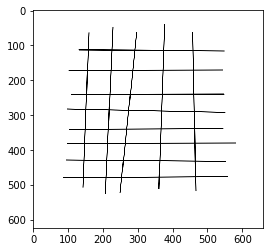

In [2]:
filename = 'image/harris_test_1.png'

img = cv2.imread(filename)

plt.imshow(img)

In [3]:
# 转换成灰度图像
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
gray = np.float32(gray)
#图像转换为float32

### 2.harris角点检测

In [5]:
dst = cv2.cornerHarris(gray,2,3,0.04)

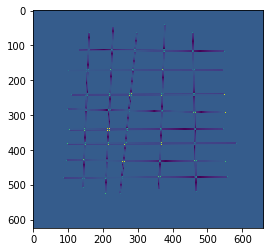

In [6]:
plt.imshow(dst)

In [7]:
#图像膨胀,对于这个部分可以不要
dst = cv2.dilate(dst,None)

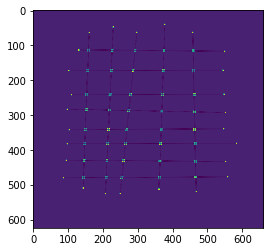

In [8]:
plt.imshow(dst)

### 3.阈值设置

- 设定阈值,这里的打分值以大于0.01×dst中最大值为边界,角点位置用红色标记
- 对于这个部分也可以先进行归一化,然后再设置阈值

- 代码解释:<br>
    img[dst>0.01*dst.max()]=[0,0,255],dst>0.01*dst.max()这么多返回是满足条件的dst索引值,根据索引值来设置这个点的颜色这里是设定一个阈值.当大于这个阈值分数的都可以判定为角点.这里的dst其实就是一个个角度分数R组成的当λ1和λ2都很大，并且λ1～λ2中的时，R也很大,（λ1和λ2中的最小值都大于阈值）说明这个区域是角点。那么这里为什么要大于0.01×dst.max()?注意了这里Ｒ是一个很大的值我们选取里面最大的Ｒ然后只要dst里面的值大于百分之一的Ｒ的最大值那么此时这个dst的Ｒ值也是很大的可以判定他为角点也不一定要0.01可以根据图像自己选取不过如果太小的话　可能会多圈出几个不同的角点

In [9]:
img[dst>0.01*dst.max()]=[225,0,0]

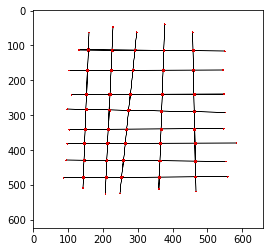

In [10]:
plt.imshow(img)